<font color='red'> <h1 align="center">Technology For All Hackathon</h1> </font>

<font color='Blue'> <h1 align="left">Pubg EDA</h1> </font>

## Detailed Description of the dataset

Data fields
- DBNOs - Number of enemy players knocked.
- assists - Number of enemy players this player damaged that were killed by teammates.
- boosts - Number of boost items used.
- damageDealt - Total damage dealt. Note: Self inflicted damage is subtracted.
- headshotKills - Number of enemy players killed with headshots.
- heals - Number of healing items used.
- Id - Player’s Id
- killPlace - Ranking in match of number of enemy players killed.
- killPoints - Kills-based external ranking of players. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.
- killStreaks - Max number of enemy players killed in a short amount of time.
- kills - Number of enemy players killed.
- longestKill - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.
- matchDuration - Duration of match in seconds.
- matchId - ID to identify matches. There are no matches that are in both the training and testing set.
- matchType - String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.
- rankPoints - Elo-like ranking of players. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes the place of “None”.
- revives - Number of times this player revived teammates.
rideDistance - Total distance traveled in vehicles measured in meters.
- roadKills - Number of kills while in a vehicle.
- swimDistance - Total distance traveled by swimming measured in meters.
- teamKills - Number of times this player killed a teammate.
- vehicleDestroys - Number of vehicles destroyed.
- walkDistance - Total distance traveled on foot measured in meters.
- weaponsAcquired - Number of weapons picked up.
- winPoints - Win-based external ranking of players. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in - winPoints should be treated as a “None”.
- groupId - ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.
- numGroups - Number of groups we have data for in the match.
- maxPlace - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.
- winPlacePerc - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

In [19]:
# Importing the required libraries

import numpy as np # Linear Algebra
import pandas as pd # Data Manipulation
import matplotlib.pyplot as plt # Data Visualization
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
from scipy import stats # Statistics
import warnings
warnings.filterwarnings('ignore')# Avoid warnings

In [20]:
# Importing the data

data = pd.read_csv("data (1).csv")

In [21]:
# Viewing the data

data.head()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2093518,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,...,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
1,3701672,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,...,0,0.0,0,0.0,0,0,1918.00,7,1516,0.5862
2,2059784,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,...,0,4088.0,0,0.0,0,0,820.00,7,0,0.8105
3,1302036,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,...,1,0.0,0,0.0,0,0,38.81,0,1515,0.5556
4,297180,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,...,0,918.4,0,0.0,0,0,1721.00,5,0,0.6429


In [22]:
# Shape of the dataset

data.shape

(1111742, 30)

In [23]:
# Columns

data.columns

Index(['Unnamed: 0', 'Id', 'groupId', 'matchId', 'assists', 'boosts',
       'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace',
       'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration',
       'matchType', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc'],
      dtype='object')

In [24]:
# Summary of the dataste

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111742 entries, 0 to 1111741
Data columns (total 30 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1111742 non-null  int64  
 1   Id               1111742 non-null  object 
 2   groupId          1111742 non-null  object 
 3   matchId          1111742 non-null  object 
 4   assists          1111742 non-null  int64  
 5   boosts           1111742 non-null  int64  
 6   damageDealt      1111742 non-null  float64
 7   DBNOs            1111742 non-null  int64  
 8   headshotKills    1111742 non-null  int64  
 9   heals            1111742 non-null  int64  
 10  killPlace        1111742 non-null  int64  
 11  killPoints       1111742 non-null  int64  
 12  kills            1111742 non-null  int64  
 13  killStreaks      1111742 non-null  int64  
 14  longestKill      1111742 non-null  float64
 15  matchDuration    1111742 non-null  int64  
 16  matchType        1

In [25]:
# Staistics of the dataset

data.describe()

,Unnamed: 0,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,...,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111741e+06
mean,2.224362e+06,2.336738e-01,1.106655e+00,1.307364e+02,6.573612e-01,2.266488e-01,1.370348e+00,4.759562e+01,5.044301e+02,9.255097e-01,...,1.641784e-01,6.042142e+02,3.551184e-03,4.545068e+00,2.401097e-02,7.833652e-03,1.153282e+03,3.659685e+00,6.057065e+02,4.727868e-01
std,1.283879e+06,5.894028e-01,1.716050e+00,1.711755e+02,1.146023e+00,6.033356e-01,2.683819e+00,2.747025e+01,6.274006e+02,1.562216e+00,...,4.704189e-01,1.495949e+03,7.385452e-02,3.061857e+01,1.678909e-01,9.194621e-02,1.182788e+03,2.461805e+00,7.395140e+02,3.073771e-01
min,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.112440e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.552000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,2.223772e+06,0.000000e+00,0.000000e+00,8.411000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.841000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,3.337954e+06,0.000000e+00,2.000000e+00,1.859000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.171000e+03,1.000000e+00,...,0.000000e+00,7.927500e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.975000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,4.446964e+06,1.700000e+01,2.400000e+01,5.990000e+03,3.500000e+01,6.400000e+01,7.300000e+01,1.000000e+02,2.170000e+03,7.200000e+01,...,2.300000e+01,3.540000e+04,1.400000e+01,2.668000e+03,1.000000e+01,5.000000e+00,1.396000e+04,1.770000e+02,2.002000e+03,1.000000e+00


In [26]:
# Checking for null values

data.isnull().sum()

Unnamed: 0         0
Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

We have a single Nan value in Target 'winPlacePerc' column

In [27]:
# Data Types 

data.dtypes

Unnamed: 0           int64
Id                  object
groupId             object
matchId             object
assists              int64
boosts               int64
damageDealt        float64
DBNOs                int64
headshotKills        int64
heals                int64
killPlace            int64
killPoints           int64
kills                int64
killStreaks          int64
longestKill        float64
matchDuration        int64
matchType           object
maxPlace             int64
numGroups            int64
rankPoints           int64
revives              int64
rideDistance       float64
roadKills            int64
swimDistance       float64
teamKills            int64
vehicleDestroys      int64
walkDistance       float64
weaponsAcquired      int64
winPoints            int64
winPlacePerc       float64
dtype: object

In [28]:
# Dropping the unnecessary columns

data.drop(['Unnamed: 0'],axis=1, inplace=True)

In [29]:
# Checking for Outliers

def find_outliers(col):
    outliers = []
    Q1 = data[col].quantile(.25)
    Q3 = data[col].quantile(.75)
    
    IQR = Q3 - Q1

    lower_limit = Q1 - (1.5 * IQR)
    upper_limit = Q3 + (1.5 * IQR)
    
    print('Q1:',Q1,', Q3:',Q3,', IQR:',IQR,', Lower_extreme:',lower_limit,', Upper_extreme:', upper_limit)
    
    for i in data[col]:
        if (i > upper_limit) or (i < lower_limit):
            outliers.append(i)
            
    return outliers

In [30]:
def box_dist_plot(col):
    fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(14, 4))
    sns.boxplot(x=data[col], ax=ax1)
    ax1.set_title('Boxplot of {}'.format(data[col].name))
    sns.distplot(data[col], ax=ax2)
    ax2.set_title('Distribution plot of {}'.format(data[col].name))
    data[col].hist(ax=ax3)
    ax3.set_title('Histogram plot of {}'.format(data[col].name))
    
    fig.tight_layout()
    
def analysis(col):
    print('Mean :', data[col].mean())
    print('Median :', data[col].median())
    print('Std :', data[col].std())
    print('Missing value :', data[col].isnull().sum(), '\n')
    
    box_dist_plot(col)

Mean : 0.23367382000500117
Median : 0.0
Std : 0.5894028362471153
Missing value : 0 

Mean : 1.1066551412108205
Median : 0.0
Std : 1.716050261111
Missing value : 0 

Mean : 130.73640731139562
Median : 84.11
Std : 171.17553840607343
Missing value : 0 

Mean : 0.6573611503388376
Median : 0.0
Std : 1.1460230405292813
Missing value : 0 

Mean : 0.22664880880635974
Median : 0.0
Std : 0.6033356365153555
Missing value : 0 

Mean : 1.3703476166232813
Median : 0.0
Std : 2.683818911570628
Missing value : 0 

Mean : 47.59562200582509
Median : 47.0
Std : 27.47024743305048
Missing value : 0 

Mean : 504.43011687963576
Median : 0.0
Std : 627.4006162026765
Missing value : 0 

Mean : 0.9255096955948412
Median : 0.0
Std : 1.5622155147999381
Missing value : 0 

Mean : 0.544850333980366
Median : 0.0
Std : 0.7129031766378271
Missing value : 0 

Mean : 22.998138770146305
Median : 0.0
Std : 51.0697671886343
Missing value : 0 

Mean : 1579.347832500706
Median : 1438.0
Std : 258.9347686175144
Missing value : 0

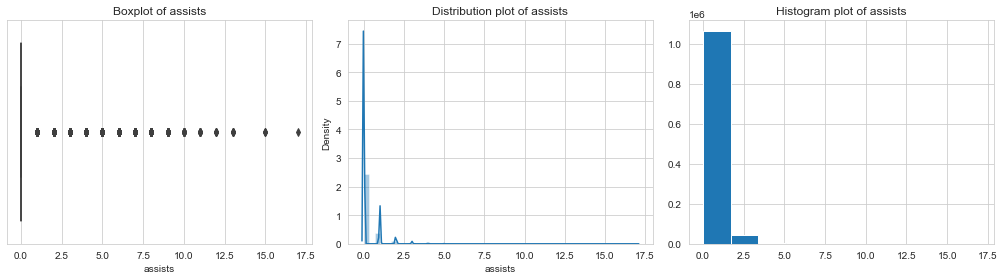

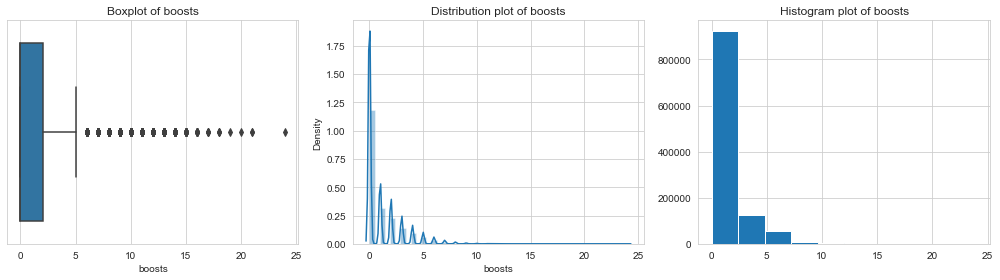

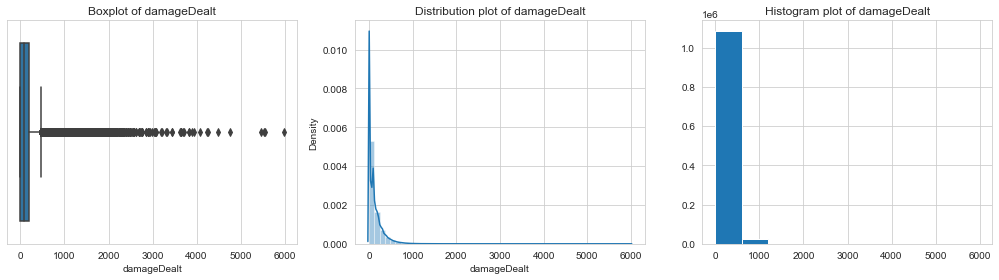

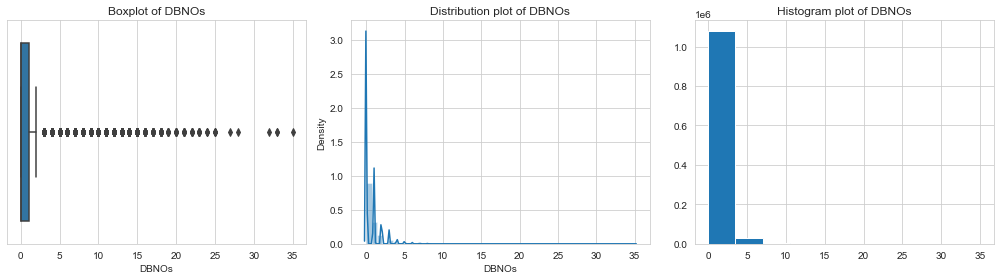

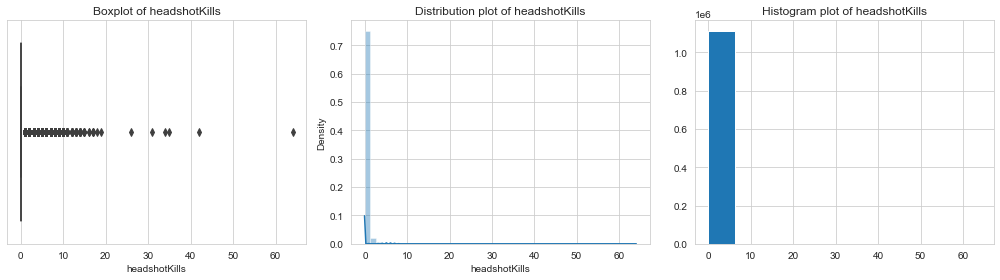

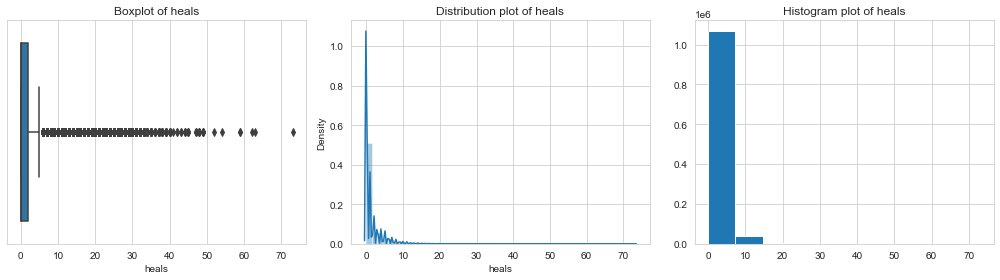

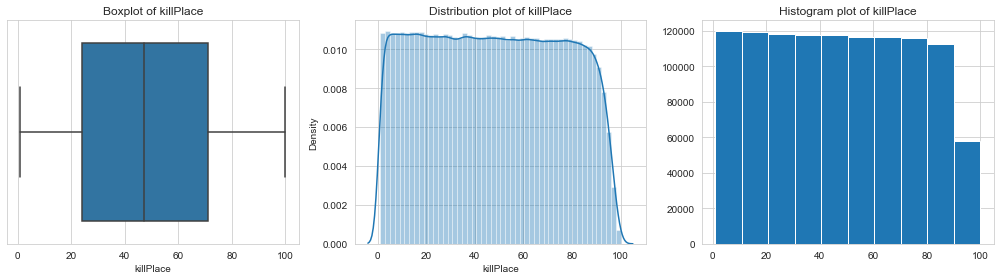

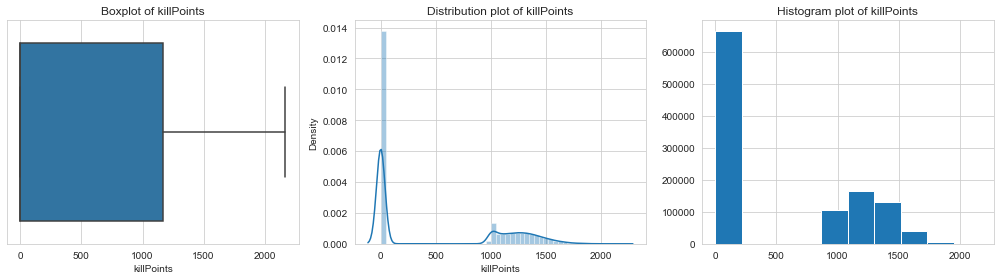

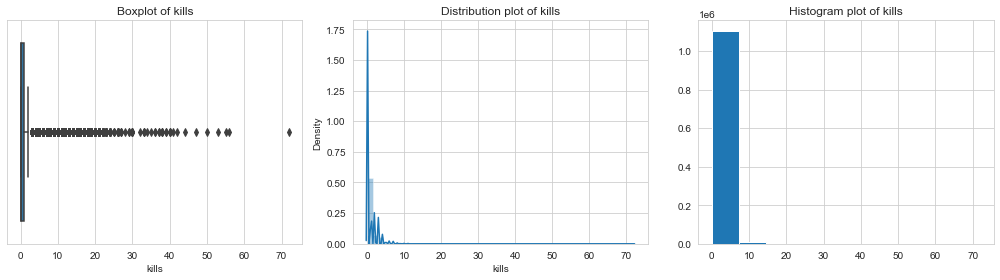

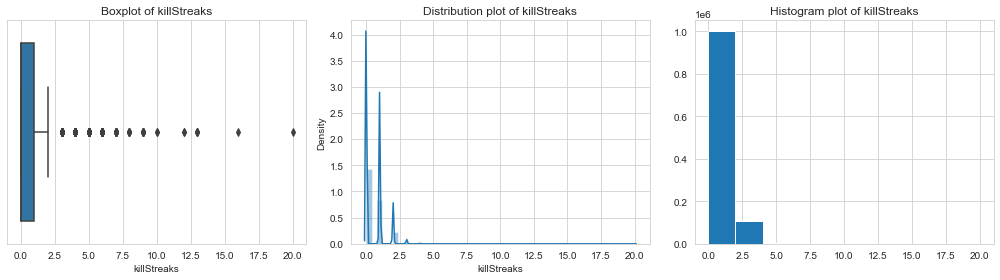

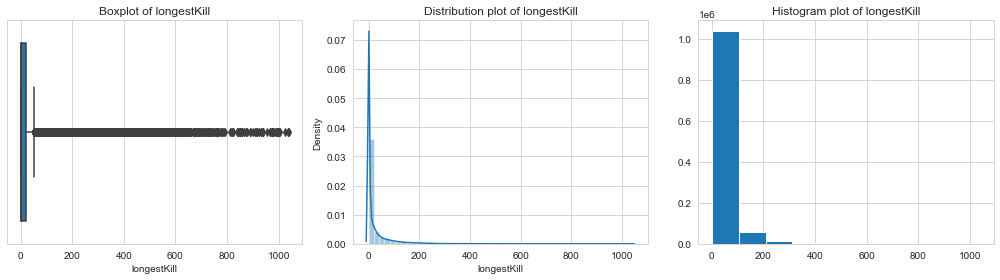

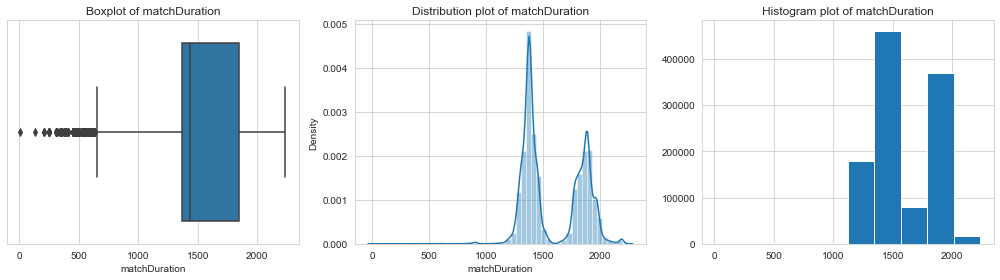

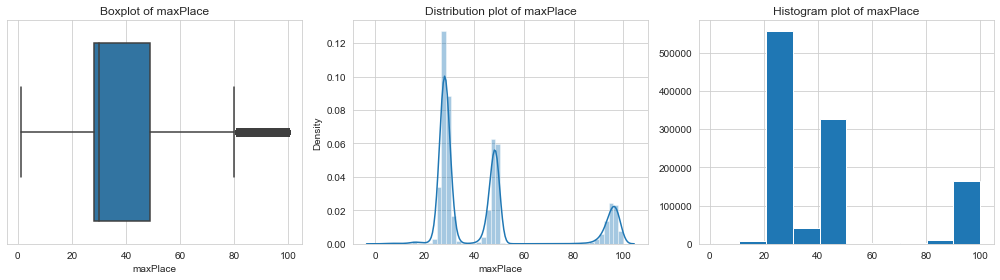

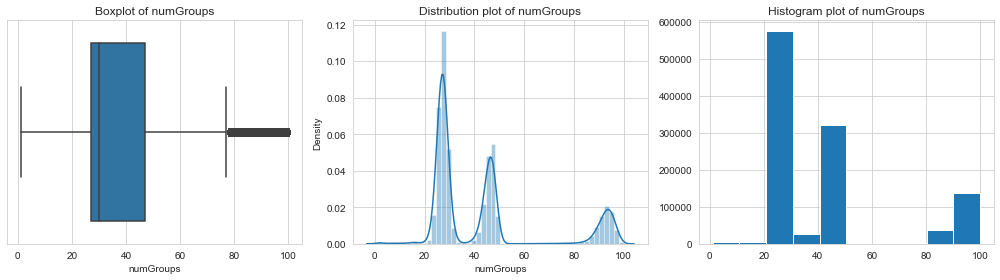

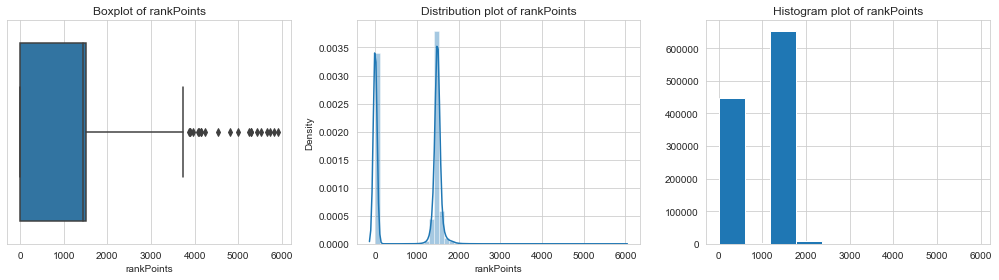

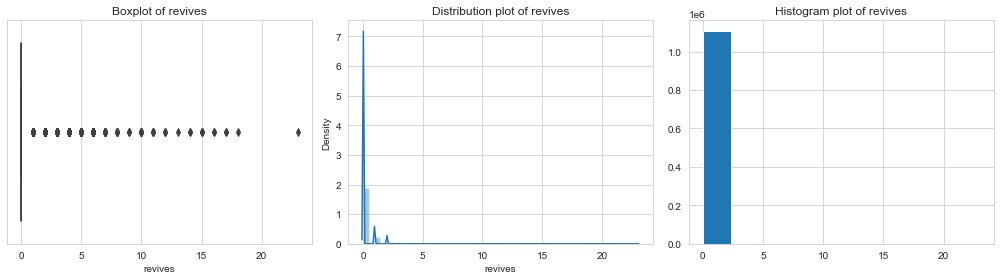

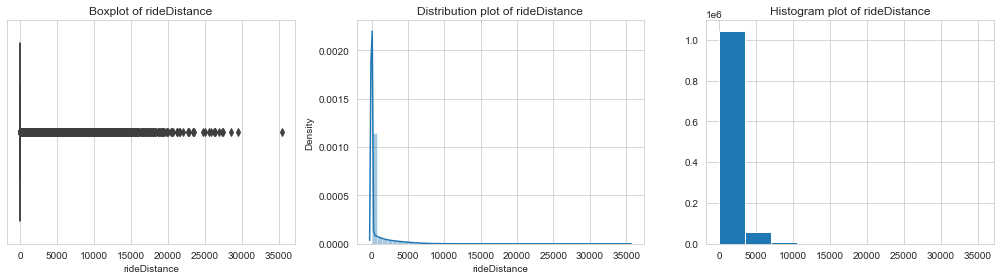

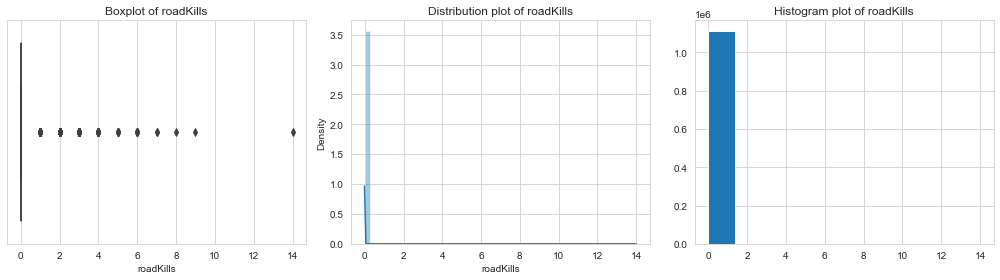

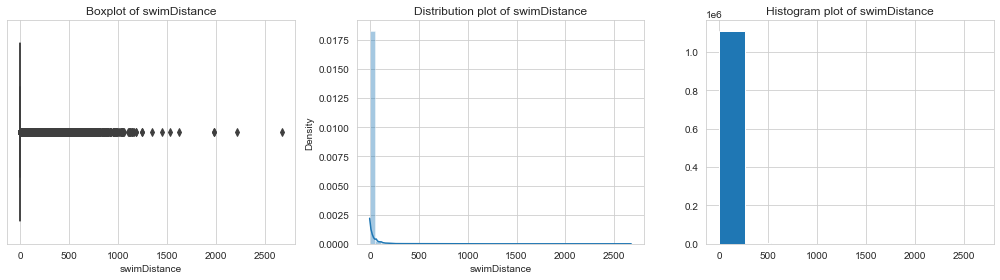

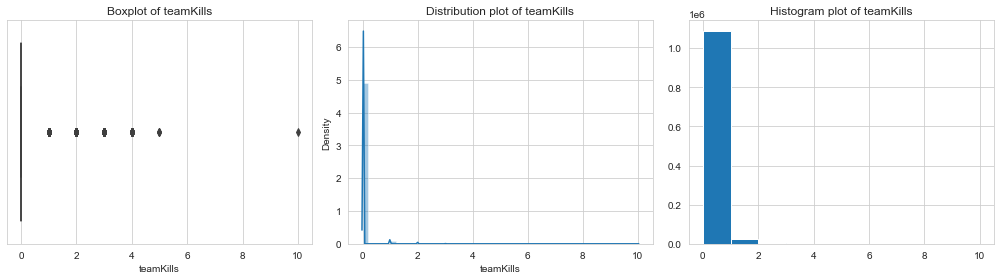

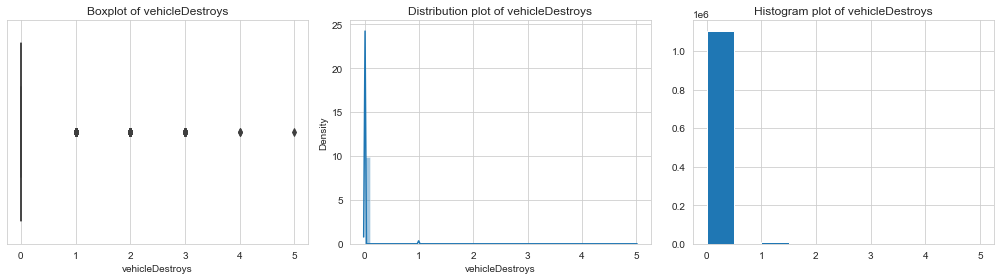

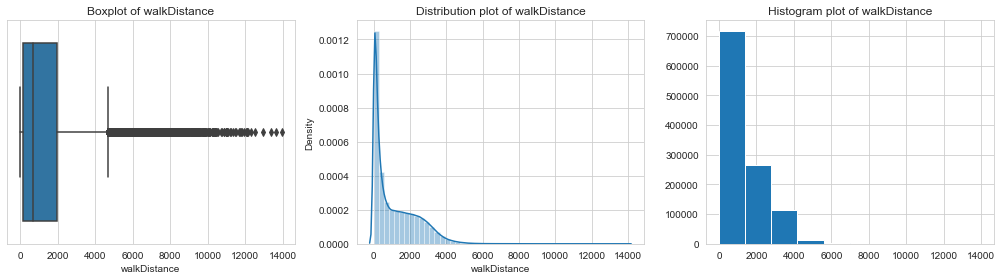

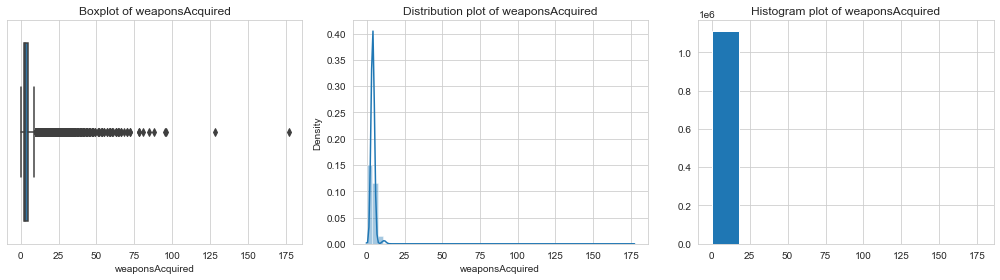

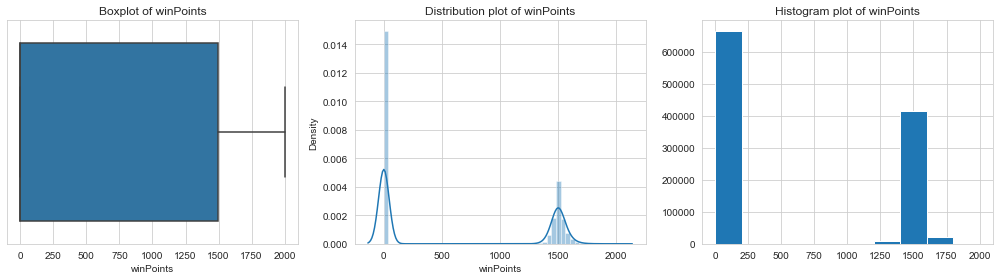

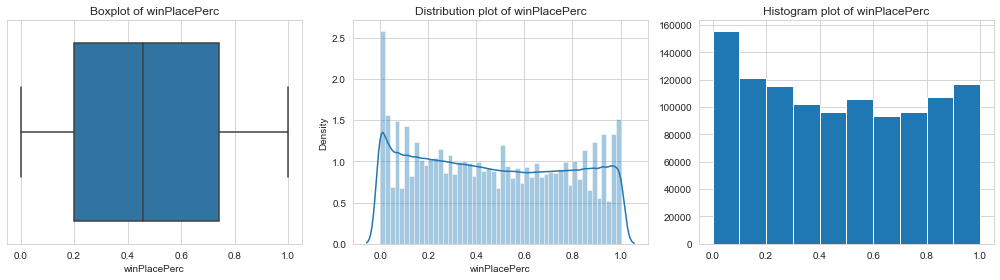

In [31]:
for i in data.columns:
    if (data[i].dtype == 'int64') or (data[i].dtype == 'float64'):
        analysis(i)

<p>We can observe from the above plots, there are many features that have huge number of outliers and some have no outliers, some are extremely Right-skewed, some are Uniformally distributed. Same in the histograms also.<p>

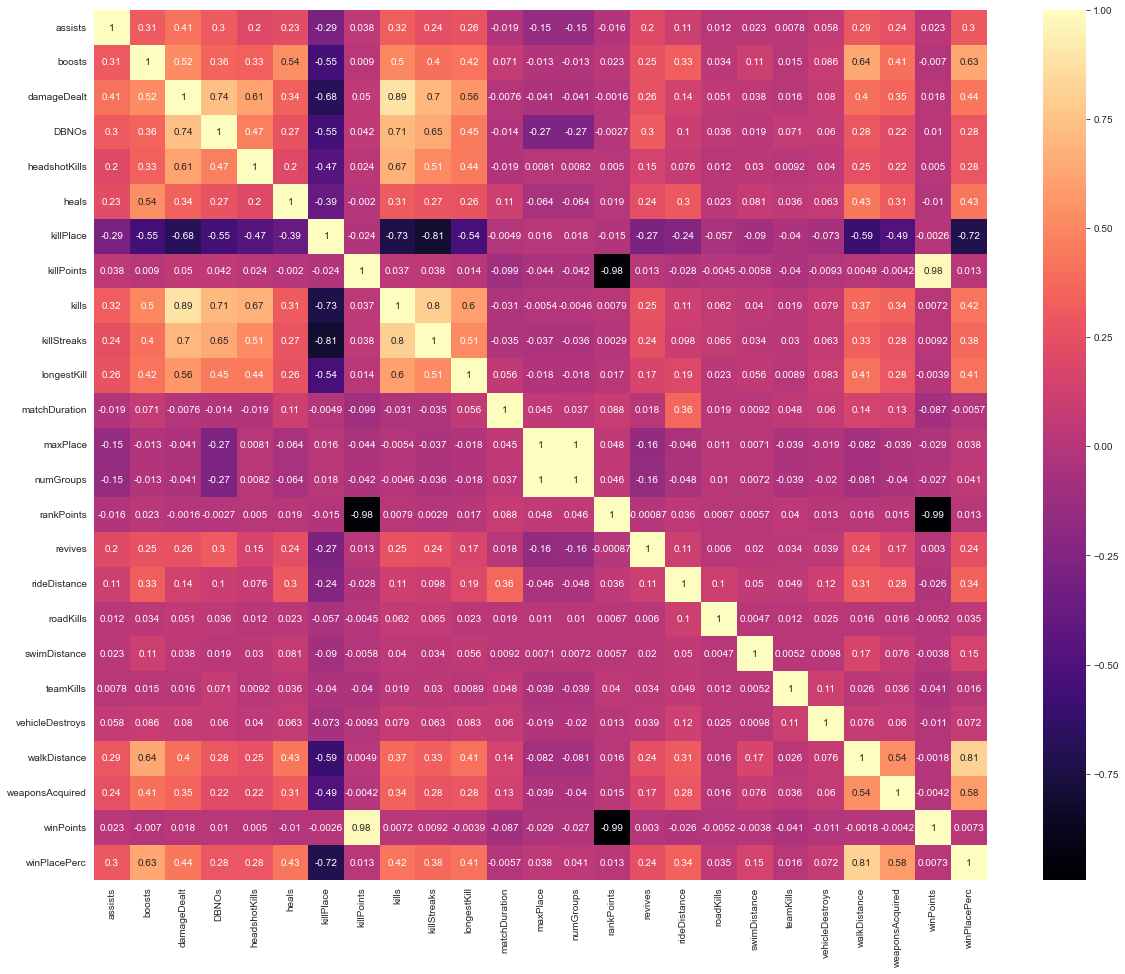

In [58]:
# Heatmap to define the correlation
plt.figure(figsize=(20,16))
corr=data.corr()
top_cor_feature=corr.index
g=sns.heatmap(data[top_cor_feature].corr(),cmap='magma',annot=True)

<p>From above we can see, there is a strong positive correlation of density with maxPlace and numGroups. However, a strong negative correlation of rankPoints and winPoints.<p>

In [32]:
# Dropping the duplicate values from the dataset

df = data.drop_duplicates()
df

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,84,...,0,0.0,0,0.000,0,0,151.30,1,1525,0.0667
1,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,57,...,0,0.0,0,0.000,0,0,1918.00,7,1516,0.5862
2,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,50,...,0,4088.0,0,0.000,0,0,820.00,7,0,0.8105
3,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,56,...,1,0.0,0,0.000,0,0,38.81,0,1515,0.5556
4,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,31,...,0,918.4,0,0.000,0,0,1721.00,5,0,0.6429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111737,43739241d6a8e8,afb7c87045825e,ad5719d2422207,0,0,70.31,0,0,0,68,...,0,0.0,0,0.000,0,0,799.80,2,0,0.3929
1111738,d57c8a22a9e38b,85e0624ddd2cb0,c3f50eef6dbb01,0,3,334.10,0,0,1,10,...,0,1549.0,0,0.000,0,0,2777.00,7,0,0.8542
1111739,c7ad131758ba55,b3759687b385b3,990a8d68ec2bc4,0,0,119.30,1,0,0,25,...,0,0.0,0,0.000,0,0,60.45,1,0,0.7174
1111740,8237d06ea2c508,13a05023ab7735,f93b1f0defaee5,1,4,53.51,1,0,7,45,...,1,3610.0,0,0.000,1,0,2209.00,4,0,0.9000


In [33]:
df = df.drop([ 'Id', 'groupId', 'matchId'],axis=1)
df

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,0,25.93,0,0,0,84,1437,0,0,...,0,0.0,0,0.000,0,0,151.30,1,1525,0.0667
1,0,0,36.71,0,0,0,57,1225,0,0,...,0,0.0,0,0.000,0,0,1918.00,7,1516,0.5862
2,0,1,47.73,0,0,0,50,0,0,0,...,0,4088.0,0,0.000,0,0,820.00,7,0,0.8105
3,0,0,0.00,0,0,0,56,1286,0,0,...,1,0.0,0,0.000,0,0,38.81,0,1515,0.5556
4,0,2,100.00,0,0,3,31,0,1,1,...,0,918.4,0,0.000,0,0,1721.00,5,0,0.6429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111737,0,0,70.31,0,0,0,68,0,0,0,...,0,0.0,0,0.000,0,0,799.80,2,0,0.3929
1111738,0,3,334.10,0,0,1,10,0,2,1,...,0,1549.0,0,0.000,0,0,2777.00,7,0,0.8542
1111739,0,0,119.30,1,0,0,25,0,1,1,...,0,0.0,0,0.000,0,0,60.45,1,0,0.7174
1111740,1,4,53.51,1,0,7,45,0,0,0,...,1,3610.0,0,0.000,1,0,2209.00,4,0,0.9000


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1111742 entries, 0 to 1111741
Data columns (total 26 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   assists          1111742 non-null  int64  
 1   boosts           1111742 non-null  int64  
 2   damageDealt      1111742 non-null  float64
 3   DBNOs            1111742 non-null  int64  
 4   headshotKills    1111742 non-null  int64  
 5   heals            1111742 non-null  int64  
 6   killPlace        1111742 non-null  int64  
 7   killPoints       1111742 non-null  int64  
 8   kills            1111742 non-null  int64  
 9   killStreaks      1111742 non-null  int64  
 10  longestKill      1111742 non-null  float64
 11  matchDuration    1111742 non-null  int64  
 12  matchType        1111742 non-null  object 
 13  maxPlace         1111742 non-null  int64  
 14  numGroups        1111742 non-null  int64  
 15  rankPoints       1111742 non-null  int64  
 16  revives          1

In [35]:
# Object column from the dataset

obj_df = df.select_dtypes(include=['object']).copy()
obj_df

,matchType
0,squad-fpp
1,squad-fpp
2,solo-fpp
3,squad-fpp
4,solo
...,...
1111737,squad-fpp
1111738,solo-fpp
1111739,duo
1111740,squad-fpp


In [36]:
# Numerical columns with in the data

num_df = df.select_dtypes(exclude=['object']).copy()
num_df

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,0,25.93,0,0,0,84,1437,0,0,...,0,0.0,0,0.000,0,0,151.30,1,1525,0.0667
1,0,0,36.71,0,0,0,57,1225,0,0,...,0,0.0,0,0.000,0,0,1918.00,7,1516,0.5862
2,0,1,47.73,0,0,0,50,0,0,0,...,0,4088.0,0,0.000,0,0,820.00,7,0,0.8105
3,0,0,0.00,0,0,0,56,1286,0,0,...,1,0.0,0,0.000,0,0,38.81,0,1515,0.5556
4,0,2,100.00,0,0,3,31,0,1,1,...,0,918.4,0,0.000,0,0,1721.00,5,0,0.6429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111737,0,0,70.31,0,0,0,68,0,0,0,...,0,0.0,0,0.000,0,0,799.80,2,0,0.3929
1111738,0,3,334.10,0,0,1,10,0,2,1,...,0,1549.0,0,0.000,0,0,2777.00,7,0,0.8542
1111739,0,0,119.30,1,0,0,25,0,1,1,...,0,0.0,0,0.000,0,0,60.45,1,0,0.7174
1111740,1,4,53.51,1,0,7,45,0,0,0,...,1,3610.0,0,0.000,1,0,2209.00,4,0,0.9000


In [37]:
obj_df.value_counts()

matchType       
squad-fpp           438781
duo-fpp             249927
squad               156573
solo-fpp            133854
duo                  78039
solo                 45679
normal-squad-fpp      4286
crashfpp              1581
normal-duo-fpp        1400
flaretpp               633
normal-solo-fpp        465
flarefpp               180
normal-squad           135
crashtpp                86
normal-solo             75
normal-duo              48
dtype: int64

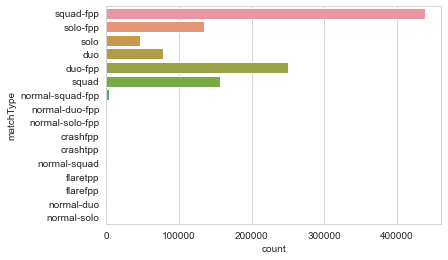

In [38]:
# Visualization of the object columns with in the data

sns.countplot(y="matchType",data=obj_df)
plt.show()

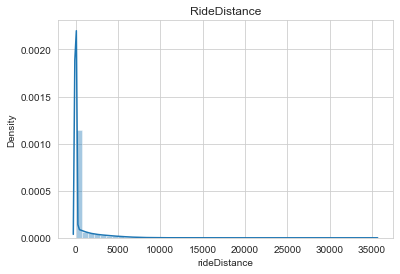

In [39]:
# Univariate Analysis 

# Plot on Ride Distance
plt.title('RideDistance')
sns.distplot(df['rideDistance'])
plt.show()

<p>From the plot it shows that most of the players have ride distance 0.Only ffew have ride distance in between the range of 1-10000<p>

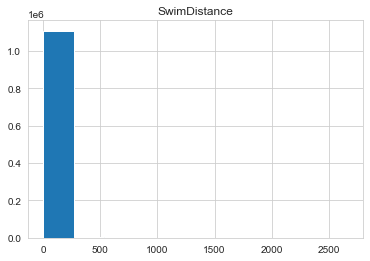

In [40]:
# Swim Distance
plt.title('SwimDistance')
plt.hist(df['swimDistance'])
plt.show()

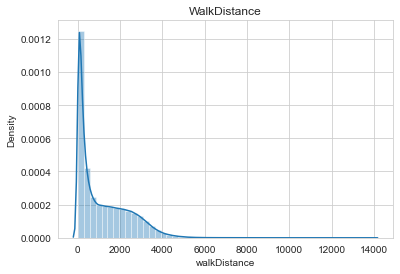

In [41]:
# Walk Distance
plt.title('WalkDistance')
sns.distplot(df['walkDistance'])
plt.show()

<p>From the above  plots we can see that the distance covered by walk is more than riding vehicle and swimming.<p>

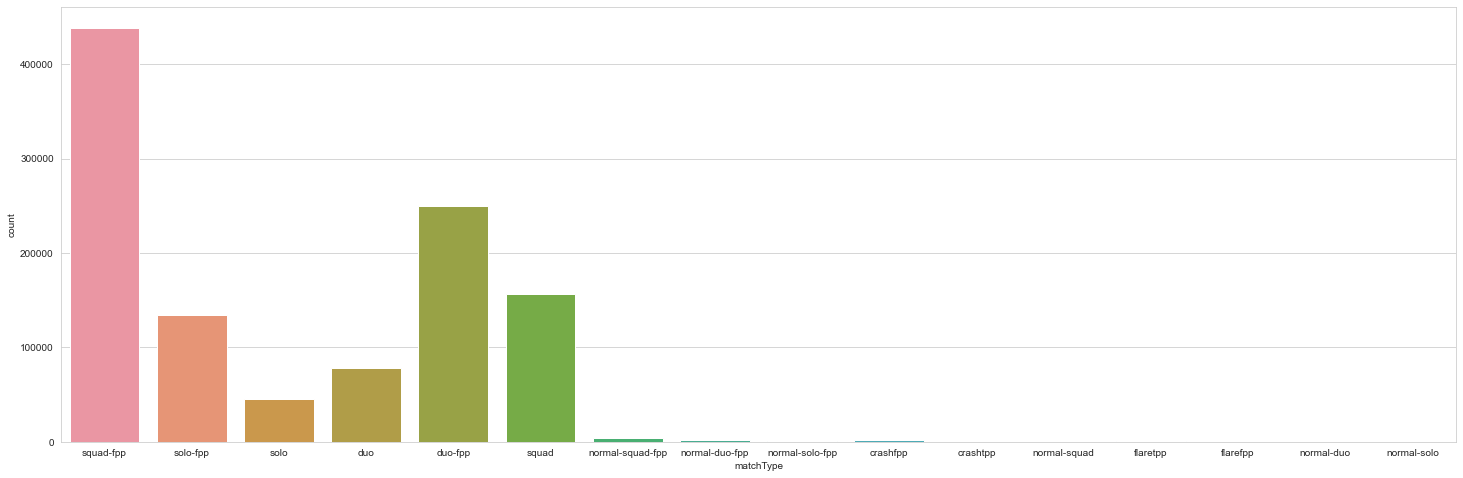

In [42]:
# Type of matches played by players
plt.figure(figsize=(25,8))
sns.countplot(df['matchType'])
plt.show()

<p>From this we see that there more no of players playing squad match compared to other match type.<p>

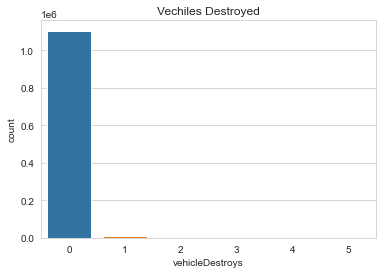

In [43]:
# Vehicles destroyed 
plt.title('Vechiles Destroyed')
sns.countplot(df['vehicleDestroys'])
plt.show()

<p>We see that in most games there is no vechile gets damaged.<p>

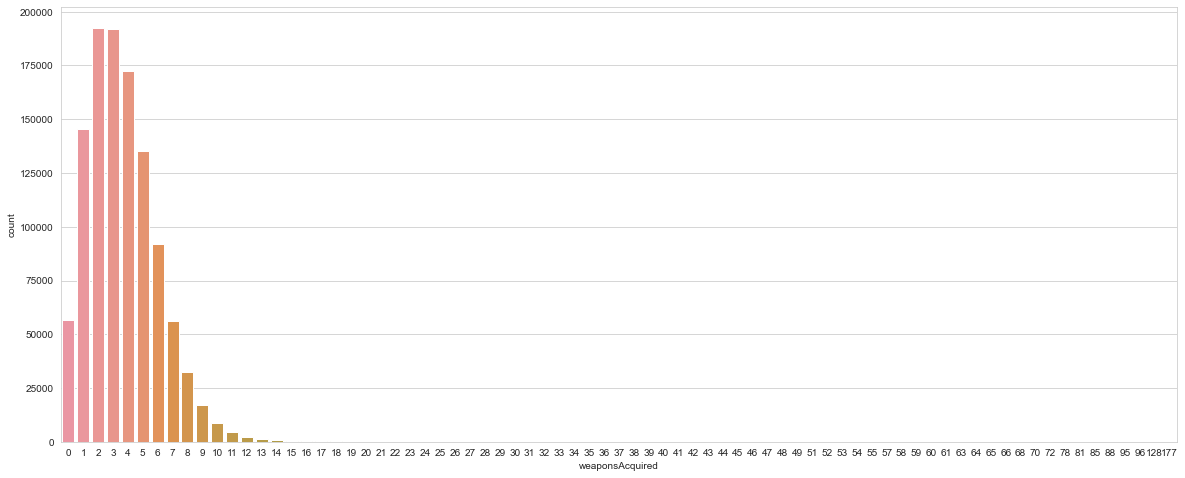

In [44]:
# Weapons acquired while playing the match
plt.figure(figsize=(20,8))
sns.countplot(x ='weaponsAcquired', data = df)
plt.show()

<p>From the plot it shows that most of the players are acquiring only 2 to 3 weapons.<p>

In [45]:
df_raw = pd.concat([num_df,obj_df],axis=1,join='inner')
df_raw

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,matchType
0,0,0,25.93,0,0,0,84,1437,0,0,...,0.0,0,0.000,0,0,151.30,1,1525,0.0667,squad-fpp
1,0,0,36.71,0,0,0,57,1225,0,0,...,0.0,0,0.000,0,0,1918.00,7,1516,0.5862,squad-fpp
2,0,1,47.73,0,0,0,50,0,0,0,...,4088.0,0,0.000,0,0,820.00,7,0,0.8105,solo-fpp
3,0,0,0.00,0,0,0,56,1286,0,0,...,0.0,0,0.000,0,0,38.81,0,1515,0.5556,squad-fpp
4,0,2,100.00,0,0,3,31,0,1,1,...,918.4,0,0.000,0,0,1721.00,5,0,0.6429,solo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111737,0,0,70.31,0,0,0,68,0,0,0,...,0.0,0,0.000,0,0,799.80,2,0,0.3929,squad-fpp
1111738,0,3,334.10,0,0,1,10,0,2,1,...,1549.0,0,0.000,0,0,2777.00,7,0,0.8542,solo-fpp
1111739,0,0,119.30,1,0,0,25,0,1,1,...,0.0,0,0.000,0,0,60.45,1,0,0.7174,duo
1111740,1,4,53.51,1,0,7,45,0,0,0,...,3610.0,0,0.000,1,0,2209.00,4,0,0.9000,squad-fpp


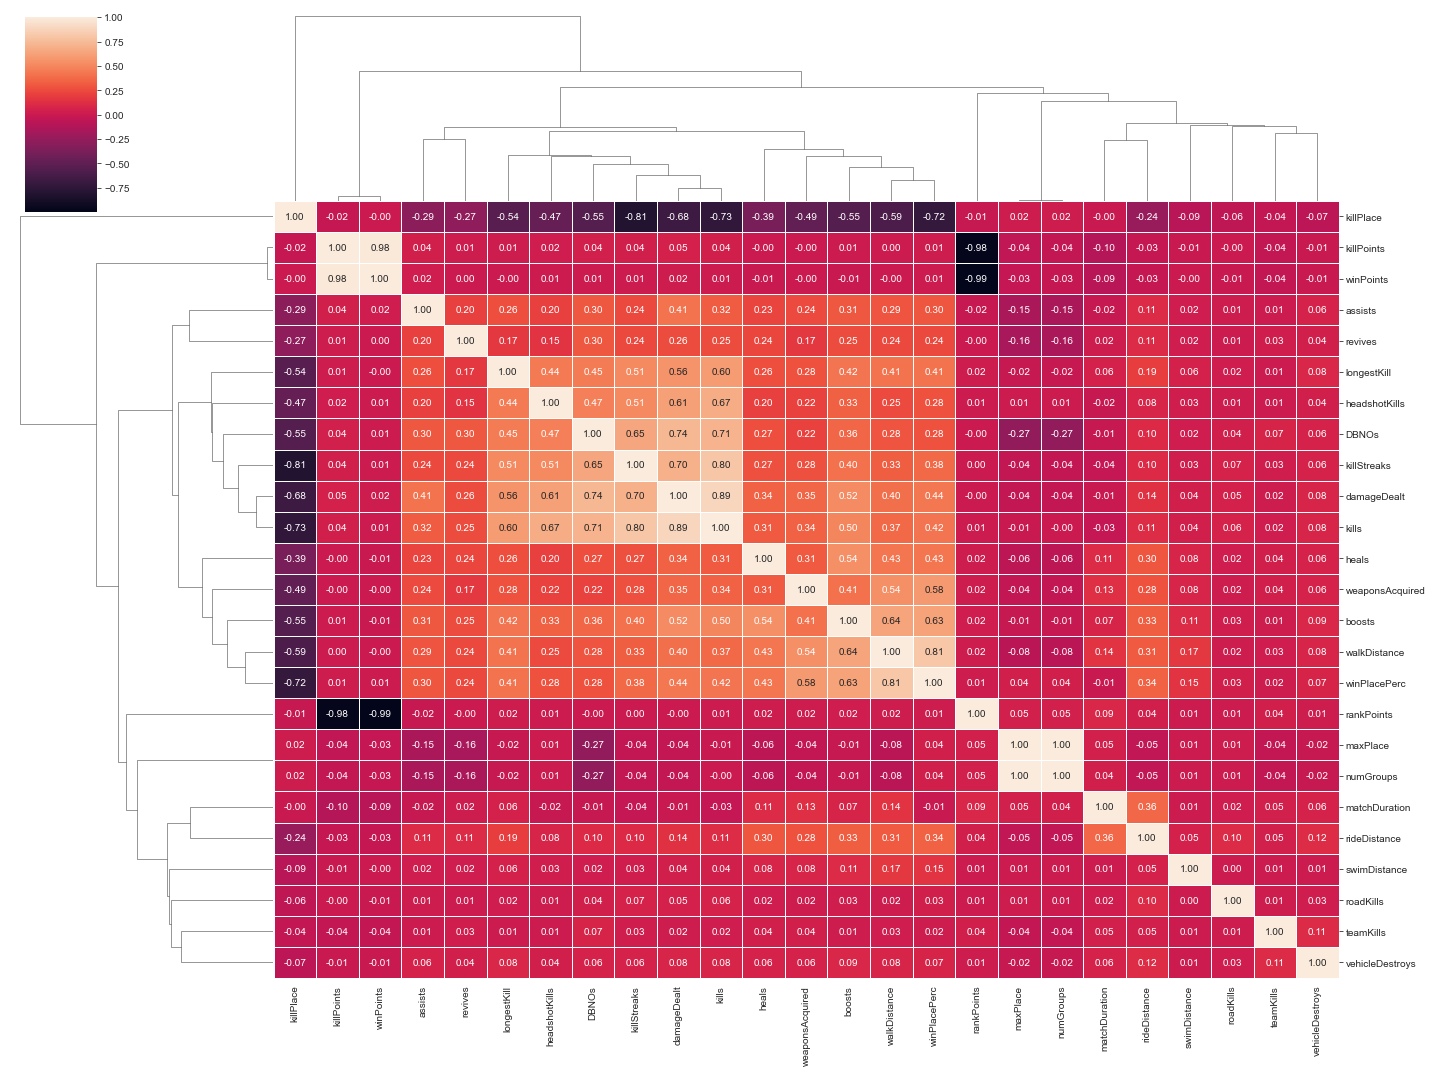

In [46]:
# ClusterMap 
ax = sns.clustermap(df_raw.corr(), annot=True, linewidths=.6, fmt= '.2f', figsize=(20, 15))
plt.show()

In [47]:
# Bivariate Analysis

print(df['headshotKills'].min())
print(df['headshotKills'].max())

0
64


In [48]:
# Printing the max column with in the data

player_identity1=df[df['headshotKills']==64]
player_identity1

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
758017,7,4,5990.0,0,64,10,1,0,72,7,...,0,0.0,0,0.0,0,0,728.1,35,0,1.0


In [49]:
# Damage dealt & Weapons Acquired with in the data

print(df['damageDealt'].max())
print(df['weaponsAcquired'].max())

5990.0
177


In [50]:
# Correlation between the damage, headshot kills & Target variable

print(df['damageDealt'].corr(df['headshotKills']))
print(df['headshotKills'].corr(df['winPlacePerc']))

0.6133062047975577
0.27617008823170247


<p>From this it is very clear that the players who have done most headshotskills acquire more damageDealt.
Similarly we see that the headshotKills doesnt completely predict the winPlacePerc since they are +vely coorelated but weak.<p>

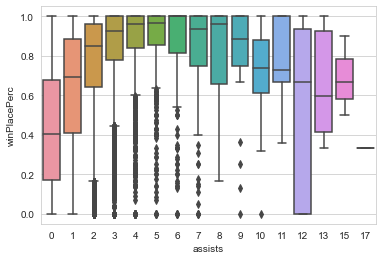

In [51]:
# Comparisons with Target column.
# Assists VS Target Variable

sns.boxplot(x='assists',y='winPlacePerc',data=df)
plt.show()

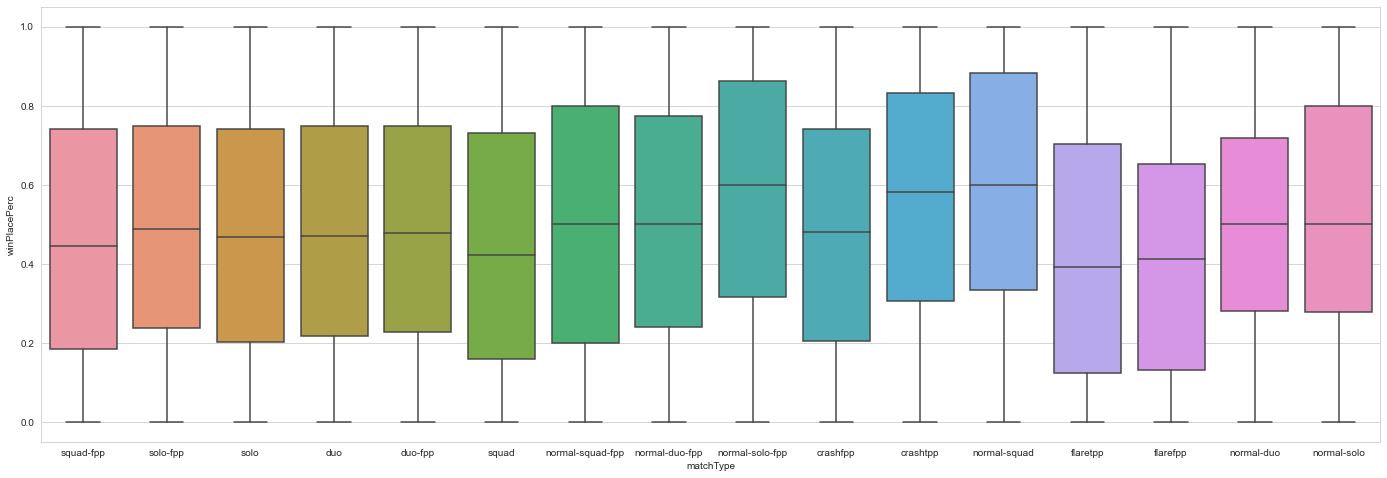

In [52]:
# Match type Vs Target variable

plt.figure(figsize=(24,8))
sns.boxplot(x='matchType',y='winPlacePerc',data=df)
plt.show()

<p>From the graph it is clear that normal-squad game and normal-solo-fpp have high win percentage than other match-type.<p>

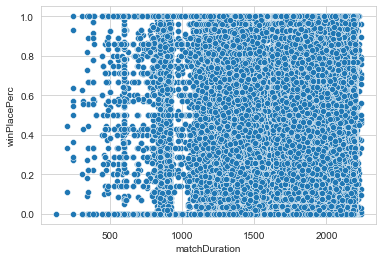

In [53]:
# Match Duration vs Target variable

sns.scatterplot(x="matchDuration", y="winPlacePerc",data=df)
plt.show()

<p>From the plot it is clear that the winPercenatge does not depend on the matchDuration as the player can win even within the duration of < 500s.<p>

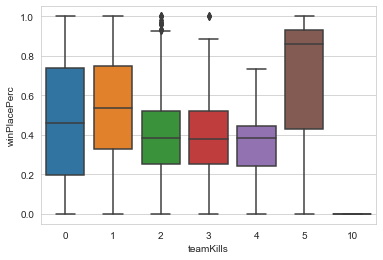

In [54]:
# Team Kills Vs Target Variable

sns.boxplot(x='teamKills',y='winPlacePerc',data=df)
plt.show()

<p>It seems interesting that the killing 5 team-members squad have high win percentage than 0-teamkill and 1-teamkill.<p>

In [55]:
# Correlation between Heals,Boosts Vs Target variable

print(df['heals'].corr(df['winPlacePerc']))
print(df['boosts'].corr(df['winPlacePerc']))

0.42729576511384243
0.6334822019701598


<p>We see that boosts are highly correlated to win percentage than heals.
This implies players use boost items in correct time which gives advantage over the enemy.<p>

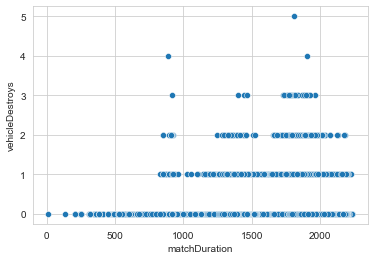

In [56]:
# Match Duration Vs Vehicle Destroys with in game

sns.scatterplot(x="matchDuration", y="vehicleDestroys",data=df)
plt.show()

<p>As we see when the match duration increases the no of vehicle getting destroyed also gets increases.<p>

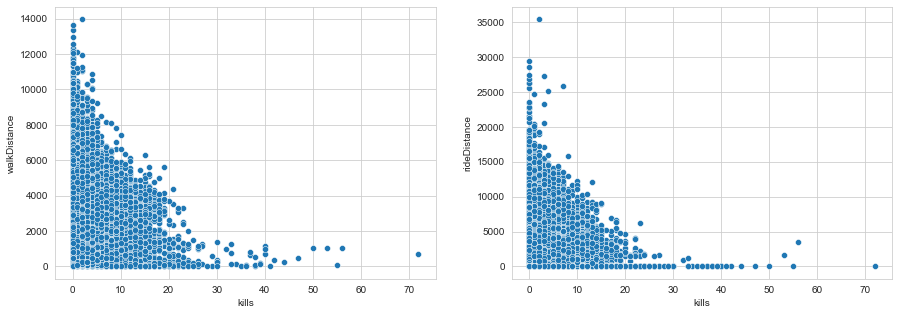

In [57]:
# Kills Vs Distance Covered

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(ax=axes[0],x="kills", y="walkDistance",data=df)
sns.scatterplot(ax=axes[1],x="kills", y="rideDistance",data=df)
plt.show()

<p>From the graph and correlation no of kills by walk is comparitively higher than kills during driving vehicle.<p>

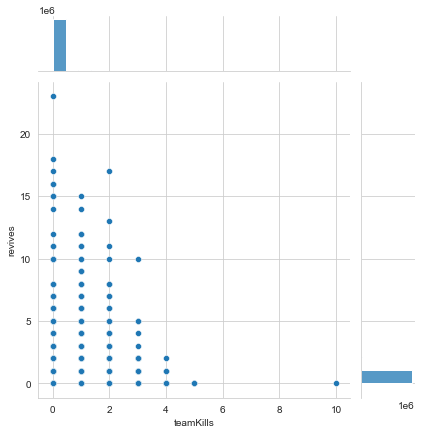

In [59]:
# Team Kills Vs Revives

sns.jointplot(df['teamKills'], df['revives'])
plt.show()

<p>From the above grpah we can see that if the person will harm its own teammembers then there wll  be a higher chances that no one will revive them.<p>

<AxesSubplot:xlabel='kills', ylabel='count'>

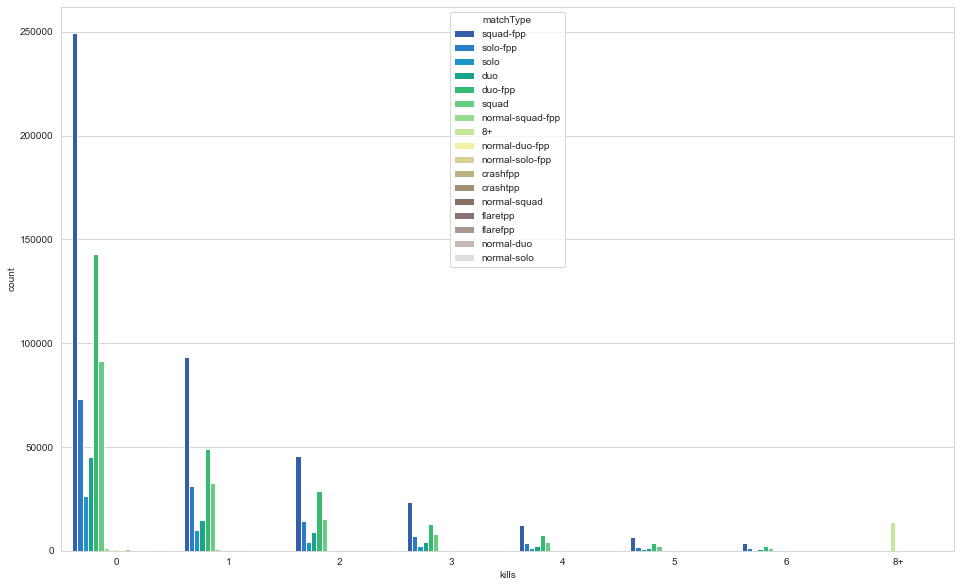

In [62]:
#now let us visualize the kills column using countplot
#but this time using matchType column into consideration

data.loc[data['kills'] > data['kills'].quantile(0.98)] = '8+'
plt.figure(figsize=(16,10))
sns.countplot(data['kills'].astype('str').sort_values(),data = data,palette='terrain',hue='matchType')
plt.show()

<p>The players who are playing matchType squad-fpp are killing more enemies.<p>

#### Final Conclusion

After performing the EDA on the above pubg dataset we come to the following points as conclusion:

1. Most of the players play in the squad-fpp matchType
2. The 0 kills count is very high 
3. As the number of kills are increasing the player count number is decreasing
4. The chances of winning the match increases with the number of kills as per the dataset
5. The players who are playing in squad-fpp are killing higher number of enemies 
6. The number of winning percentage for boosts is higher as compared to the heals
7. The chances of winning a match is higher when people are destroying vehicles
8. From the EDA we find that there is one player with null win-percentage we checked is match_id and there is no other player with the same match id.So we drop that players data.
9. We can see that the distance covered by the players by walk is more than riding vehicle and swimming.
10. We see that most of the players are playing squad matches but the win percentage is high for normal-squad game and normal-solo-fpp.
11. the player who had done most headshotkills have more damageDealt.And this holds for the rest of the players.
12. Match-Duration does not have that much impact on the win percentage.Even the player with less than 500s have high win-percentage.
13. Boosts provides most no of win-percentage than heal-items and when the match duartion increases the number of vehicle detroyed also increases in certain matches.
14. Finally we found that no of kills by players by walk is higher than while driving the vehicle.